<a href="https://colab.research.google.com/github/albarrazikrillah14/PCD-PRAKTIKUM/blob/main/Copy_of_HINT_LKP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

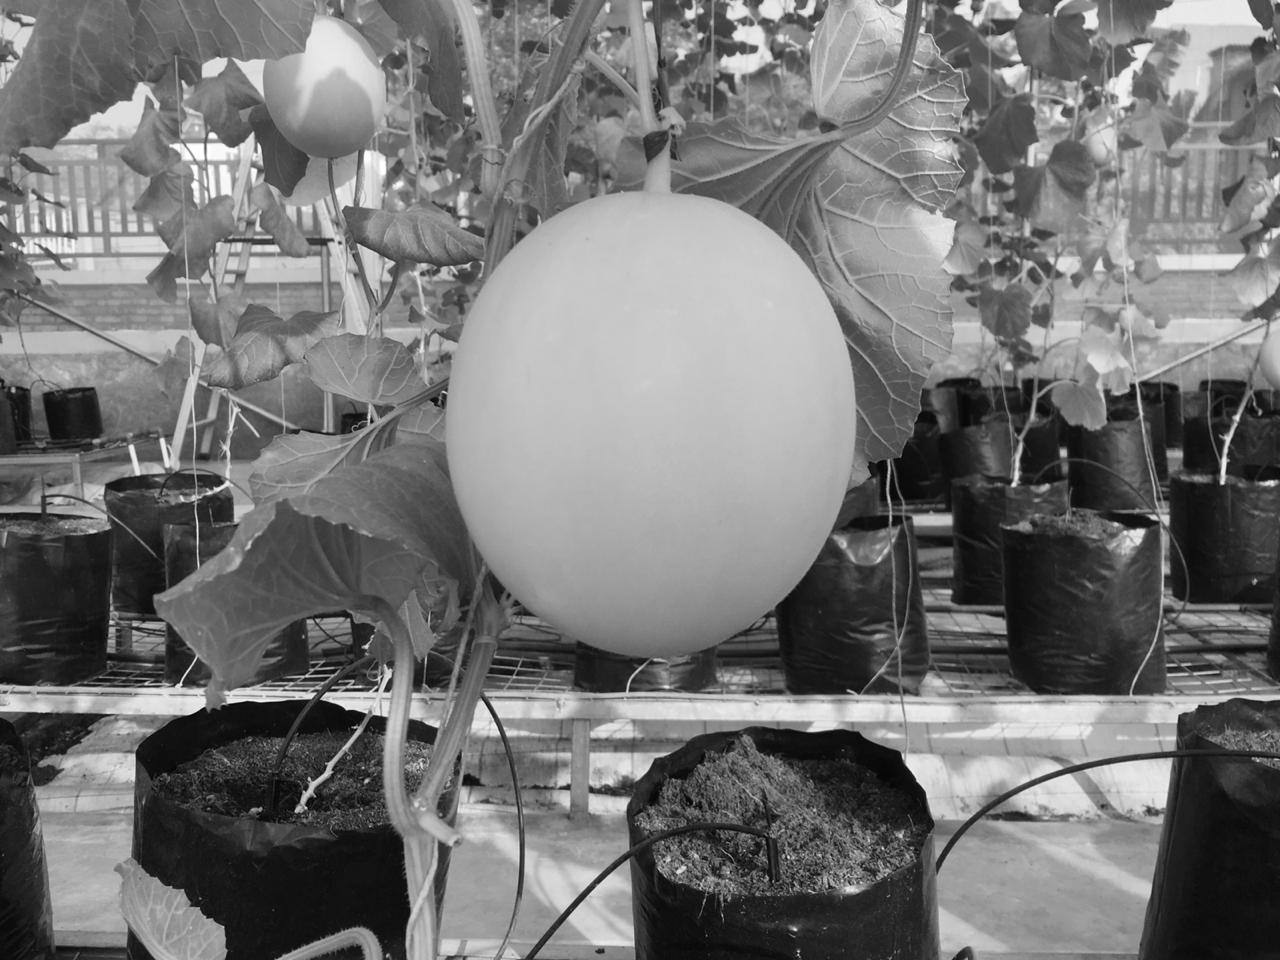

In [45]:
# buka citra dan mengubah gambar menjadi grayscale, dengan menambah 0 pada parameter
img = cv2.imread('/content/drive/MyDrive/PCD/3/melon.jpeg', 0)

# tampilkan citra hasil
cv2_imshow(img)

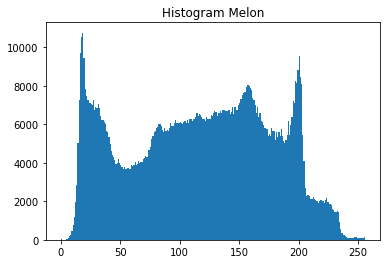

In [46]:
# plot histogram (cara 1)
plt.title("Histogram Melon")
#parameter pada plt.hist(data_yang_digunakan, bins(segment yang akan digunakan), range(max - min))
plt.hist(img.ravel(), 256, [0,256]) #ravel berfungsi untuk mengubah array multidimensi menjadi array satu dimensi
plt.savefig('/content/drive/MyDrive/PCD/3/melonHistogram.jpeg') #lokasi penyimpanan hasil
plt.show()

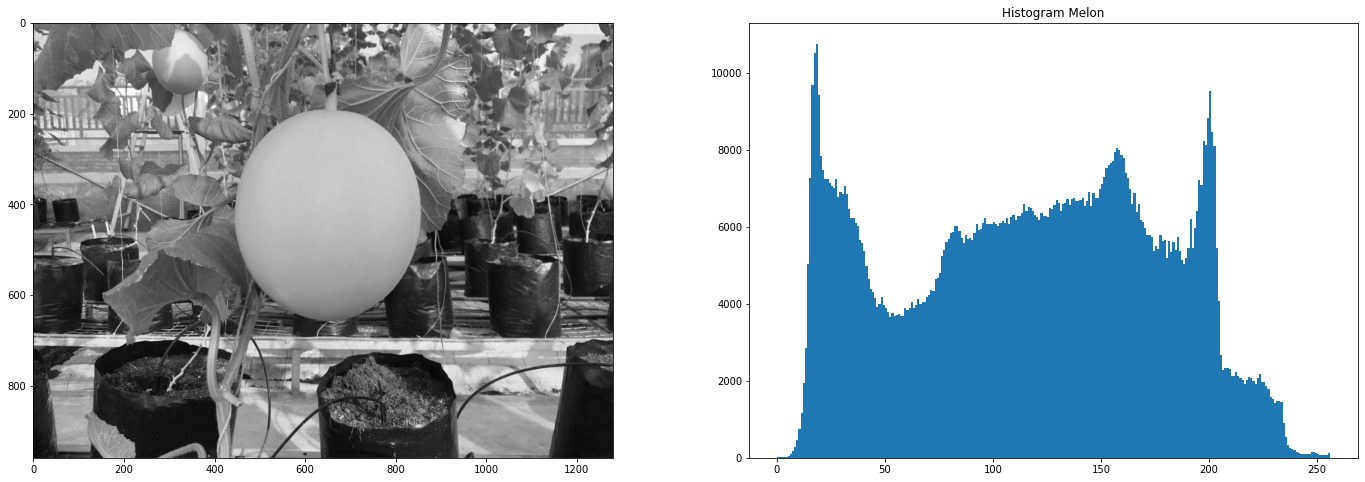

In [47]:
# plot histogram (cara 2)
# plt.subplots() adalah fungsi pada matplotlib yang digunakan untuk membuat subplot atau plot bersamaan dalam satu figure. Berikut adalah parameter yang tersedia pada fungsi ini:

# nrows: jumlah baris subplot. Nilai default adalah 1.
# ncols: jumlah kolom subplot. Nilai default adalah 1.
# sharex: menentukan apakah sumbu x dari semua subplot harus sama. Nilai default adalah False.
# sharey: menentukan apakah sumbu y dari semua subplot harus sama. Nilai default adalah False.
# squeeze: menentukan apakah figure harus dikembalikan sebagai satu-dimensional array jika hanya ada satu subplot. Nilai default adalah True.
# subplot_kw: dictionary yang berisi parameter tambahan yang akan diteruskan ke setiap subplot.
# gridspec_kw: dictionary yang berisi parameter tambahan yang akan diteruskan ke GridSpec dalam figure.

fig, ax = plt.subplots(1, 2, figsize=(24,8), squeeze=False)

#cmap berfungsi untuk menentukan bagaimana nilai data akan diterjemahkan menjadi warna
ax[0,1].set_title('Melon')
ax[0,0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0,1].set_title("Histogram Melon")
ax[0,1].hist(img.ravel(), 256, [0, 256])

plt.savefig('/content/drive/MyDrive/PCD/3/melonHistogram2.jpeg')

plt.show()

# **1. HINT - CONTRAST STRETCHING**

In [48]:
# buat fungsi contrastStretching
def contrastStretching(img):
  # ambil nilai dimensi (panjang dan lebar)
  row, col = img.shape

  # inisialisasi nilai minimum dan maksimum
  min = 255
  max = 0

  # cari nilai minimum dan maksimum pixel citra grayscale melon
  for i in range (0,row):
    for j in range (0,col):
      if (img[i,j] > max):
        max = img[i, j]
      if (img[i,j] < min):
        min = img[i,j]

  # hitung jangkauan antara nilai maksimum dan minimum
  diff = max - min

  # buat salinan dari citra yang akan dijadikan contrast stretching
  contrast_stretching = img.copy()
  
  # hitung setiap pixel citra menggunakan formula untuk histogram stretching
  for i in range (0,row):
    for j in range (0,col):
      contrast_stretching[i,j] = 255 * ((img[i,j] - min) / diff)

  # kembalikan hasil dari contrast stretching
  return contrast_stretching

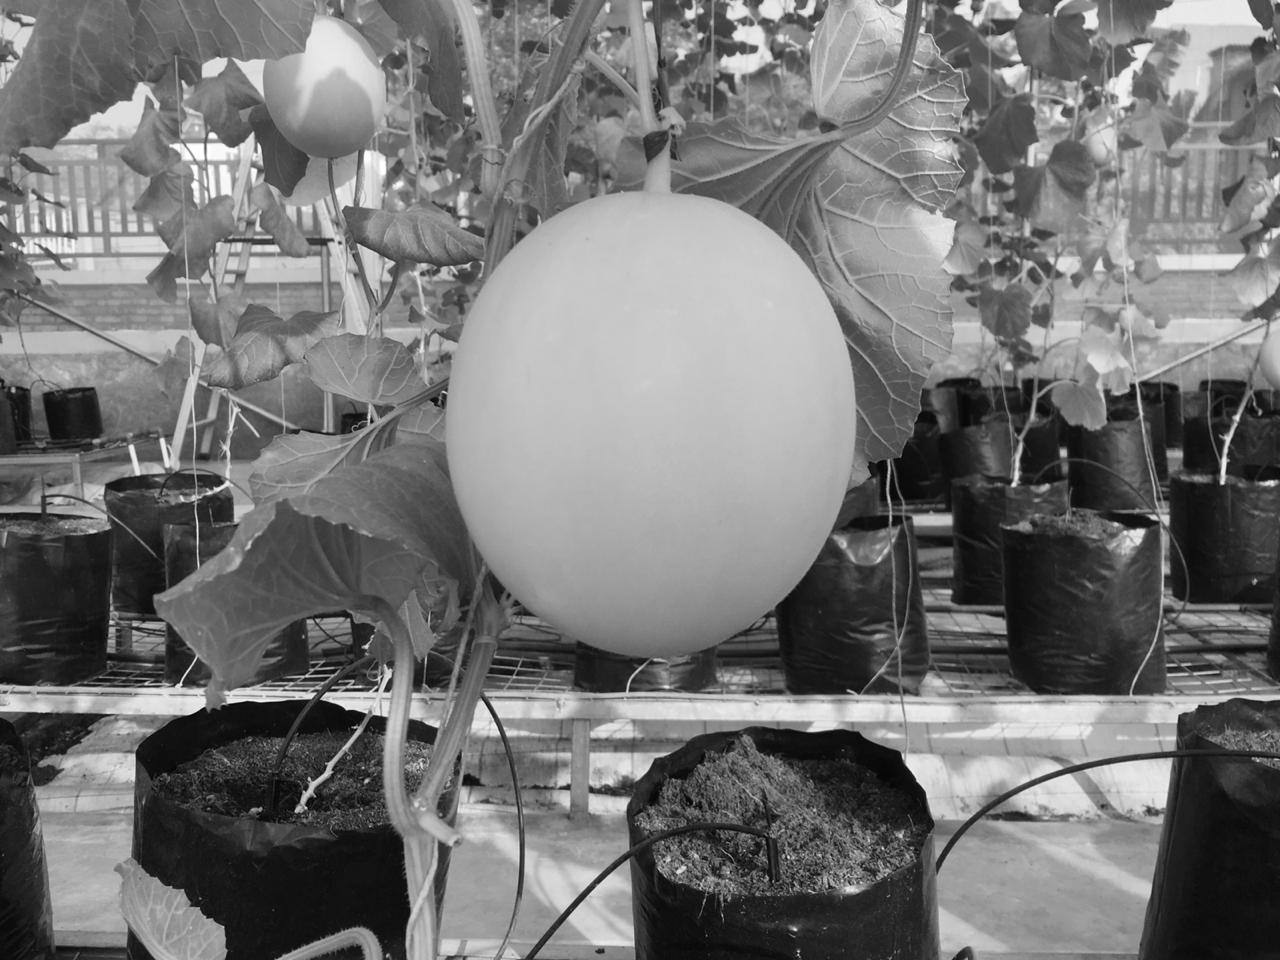

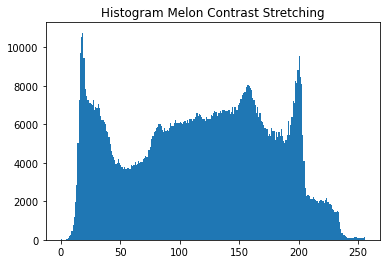

In [49]:
stretching = contrastStretching(img)

# (cara 1)
# menampilkan citra contrast stretching melon
cv2_imshow(stretching)

# menampilkan histogram contrast stretching melon
plt.hist(stretching.ravel(), 256, [0, 256])
plt.title("Histogram Melon Contrast Stretching")
plt.savefig('/content/drive/MyDrive/PCD/3/melonHistogram Contrast Stretching.jpeg')
plt.show()

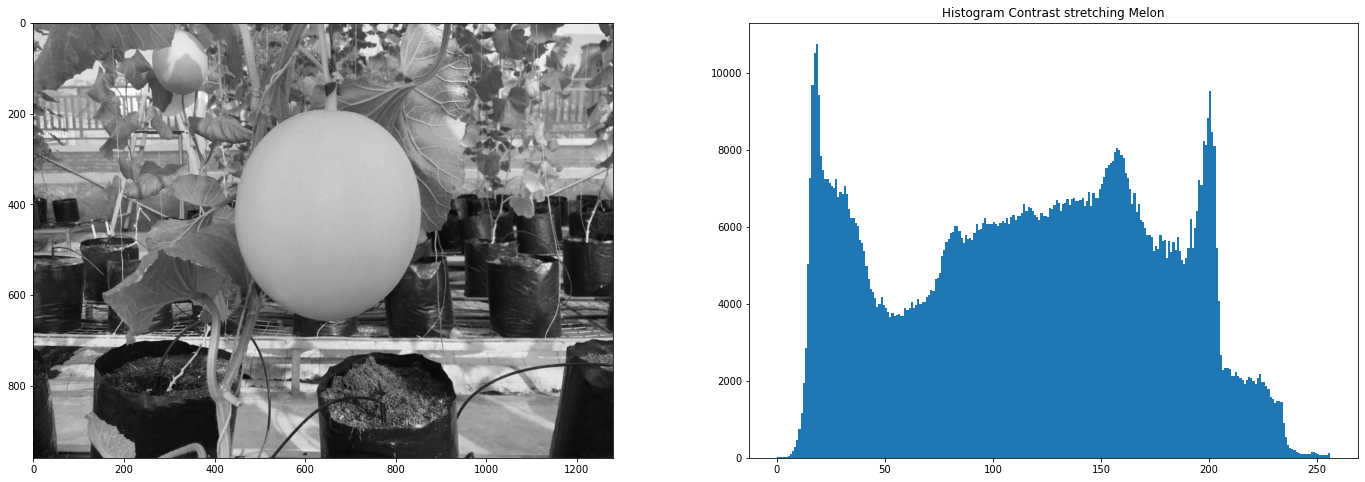

In [50]:
# (cara 2)
stretching = contrastStretching(stretching)

# menampilkan citra dan histogram contrast stretching melon.jpeg
fig, ax = plt.subplots(1, 2, figsize=(24,8), squeeze=False)

ax[0,1].set_title("Melon Stretching")
ax[0,0].imshow(stretching, cmap="gray", vmin=0, vmax=255)
ax[0,1].set_title("Histogram Contrast stretching Melon")
ax[0,1].hist(stretching.ravel(), 256, [0, 256])

plt.savefig('/content/drive/MyDrive/PCD/3/melonHistogram Contrast Stretching2.jpeg')

plt.show()

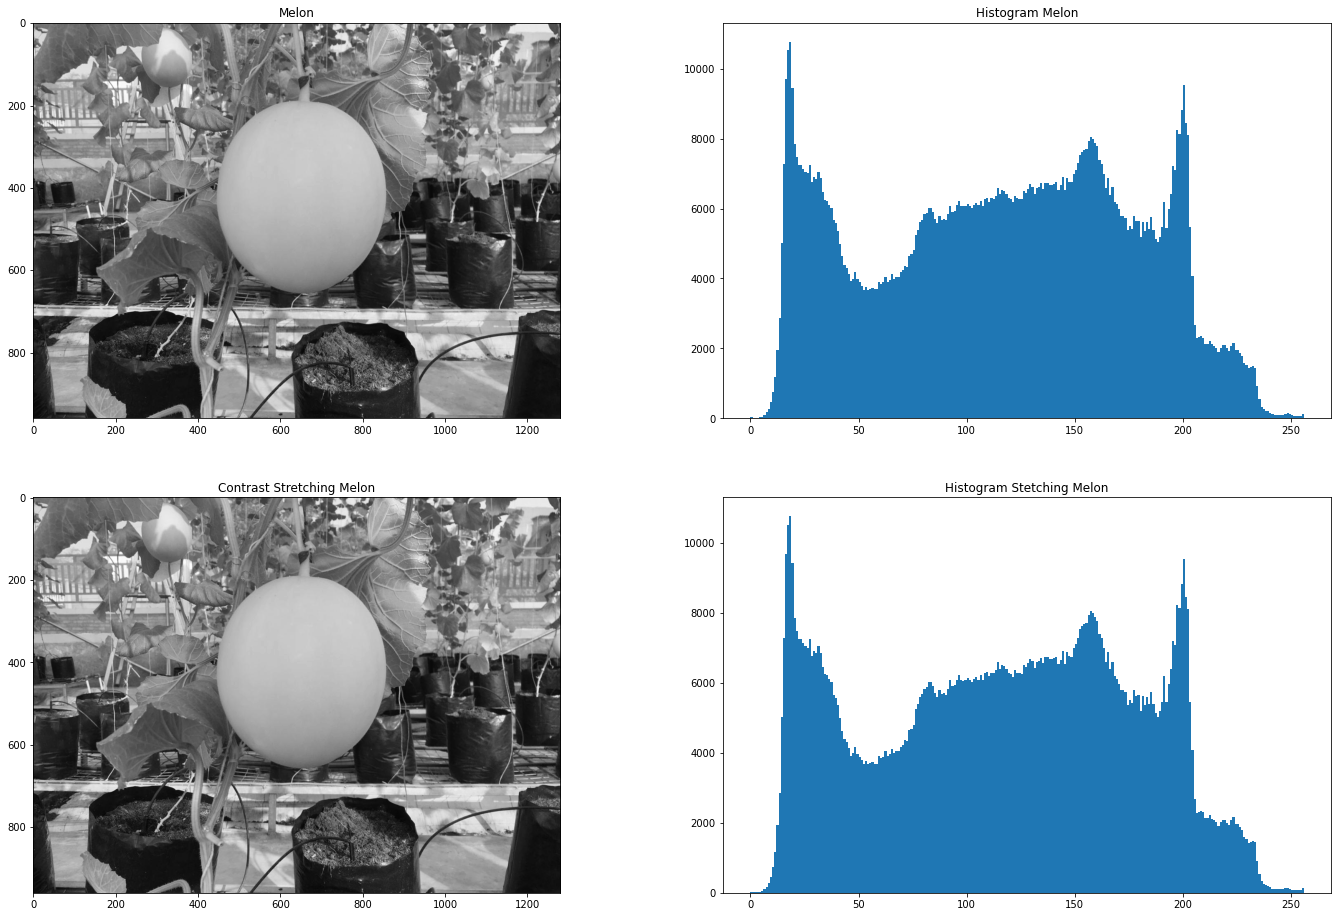

In [51]:
# perbandingan citra melon sebelum dan sesudah dilakukan contrast stretching
fig, ax = plt.subplots(2, 2, figsize=(24,16))

ax[0,0].set_title("Melon")
ax[0,0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0,1].set_title("Histogram Melon")
ax[0,1].hist(img.ravel(), 256, [0, 256])

ax[1,0].set_title("Contrast Stretching Melon")
ax[1,0].imshow(stretching, cmap='gray', vmin=0, vmax=255)
ax[1,1].set_title("Histogram Stetching Melon")
ax[1,1].hist(stretching.ravel(), 256, [0, 256])

plt.show()

# **2. HINT - EQUALIZATION**

In [52]:
# buat fungsi histogramEqualization
def histogramEqualization(img):
    # ambil nilai dimensi (panjang dan lebar) dan channel citra
    row, col = img.shape[:2]
    
    # buat array kosong bernama frekuensi
    frekuensi = np.zeros(256, np.uint64)
    
    # hitung jumlah kemunculan piksel setiap nilai derajat keabuan
    for i in range (0,row):
        for j in range (0,col):
            frekuensi[img[i,j]] += 1
    
    # hitung peluang nilai kemunculan setiap nilai derajat keabuan
    # (normalized histogram)
    peluang = frekuensi / (row*col)

    # buat array kosong bernama hist_kumulatif
    hist_kumulatif = np.zeros(256, np.float64)
  
    # hitung histogram kumulatif
    for i in range (0,256):
        if (i == 0):
            hist_kumulatif[i] = peluang[i]
        else:
            hist_kumulatif[i] = hist_kumulatif[i-1] + peluang[i]

    # buat array kosong bernama kumulatif_rentang
    kumulatif_rentang = np.zeros(256, np.int64)
  
    # Hitung kumulatif rentang (setiap hist_kumulatif dikalikan 256)
    for i in range (0,256):
        kumulatif_rentang[i] = np.round(hist_kumulatif[i]*255)

    # buat salinan dari citra derajat keabuan yang akan dijadikan equalization
    img_equ = img.copy()
  
    # lakukan histogram equalization dengan mengkonversi nilai derajat keabuan citra dengan kumulatif rentang
    for i in range (0, row):
        for j in range (0, col):
            for k in range(0, 256):
                if (img[i,j] == k): # jika nilai piksel citra sama dengan index ke-k, maka nilai piksel citra equalization adalah rentang kumulatif ke-k
                    img_equ[i,j] = kumulatif_rentang[k]
                    break

    # kembalikan hasil dari img_gray, peluang, hist_kumulatif, dan img_equ
    return img, peluang, hist_kumulatif, img_equ

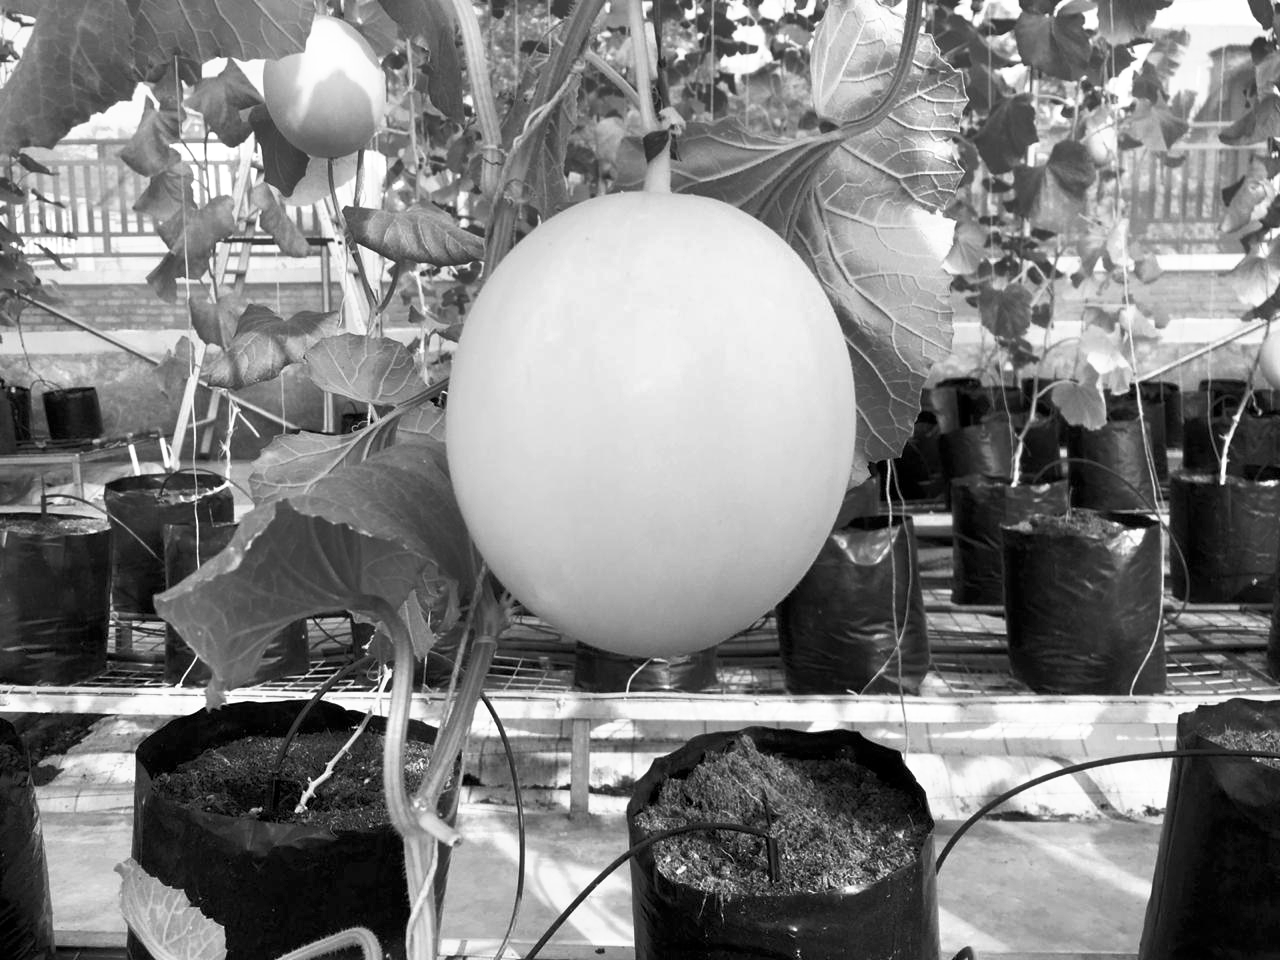

In [53]:
# inisialisasi variabel img_gray, peluang, hist_kumulatif, img_equ
# dengan memanggil fungsi histogramEqualization
img_gray, peluang, hist_kumulatif, img_equ = histogramEqualization(img)

# menampilkan citra equalization melon
cv2_imshow(img_equ)

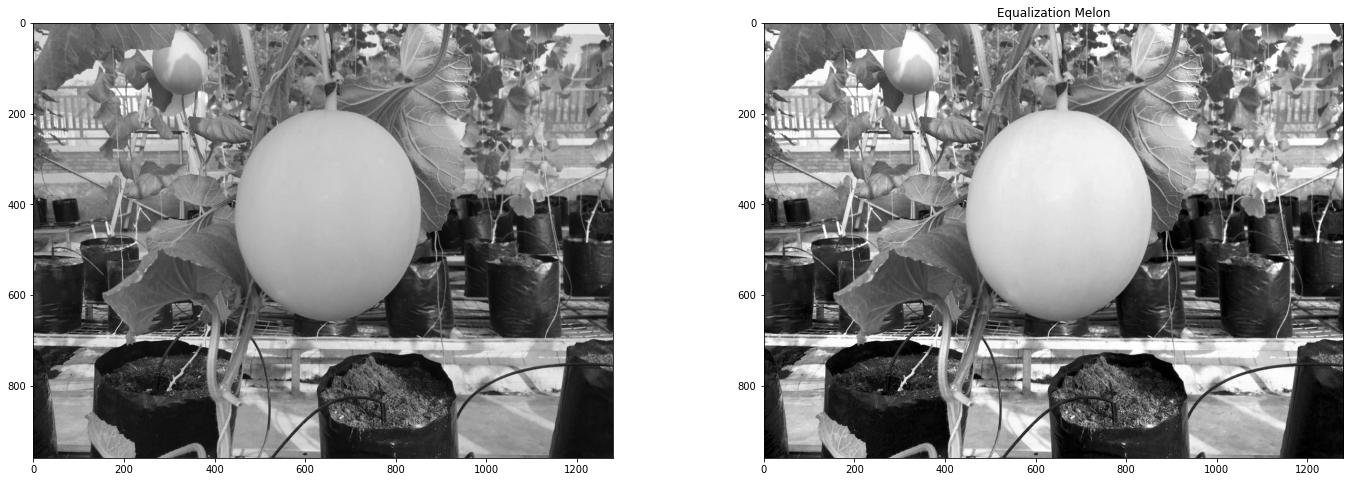

In [54]:
# perbandingan citra melon sebelum dan sesudah dilakukan equalization
fig, ax = plt.subplots(1, 2, figsize=(24,8), squeeze=False)

ax[0,1].set_title("Melon")
ax[0,0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0,1].set_title("Equalization Melon")
ax[0,1].imshow(img_equ, cmap='gray', vmin=0, vmax=255)

plt.show()

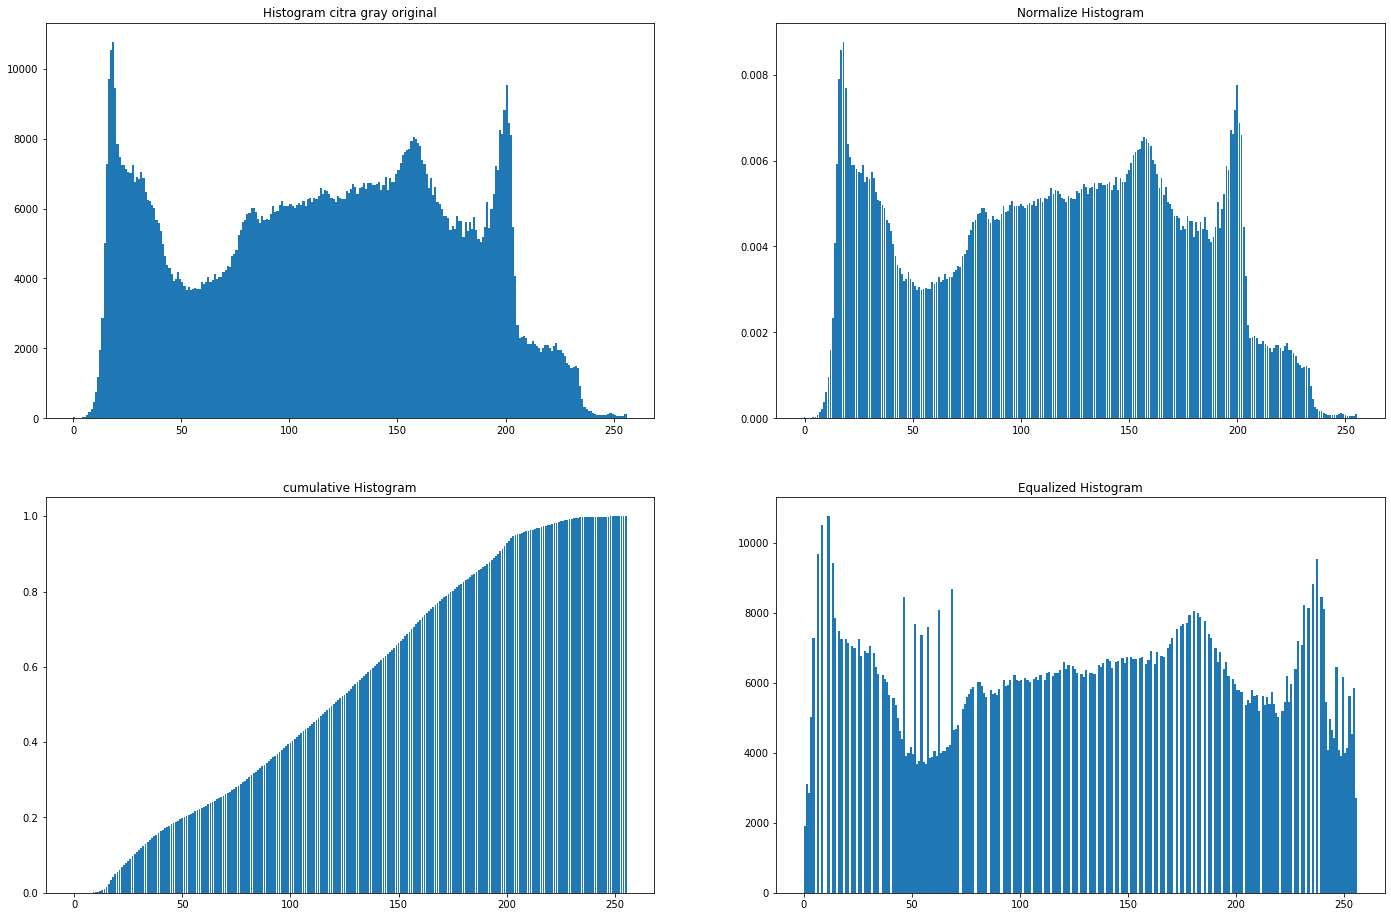

In [55]:
# Inisialisasi fungsi subplot menggunakan jumlah baris dan kolom
figure, axs = plt.subplots(2, 2, figsize=(24,16))

# Menampilkan histogram citra derajat keabuan original
axs[0,0].hist(img_gray.ravel(), 256, [0, 256])
axs[0,0].set_title("Histogram citra gray original")

# Menampilkan normalized histogram
axs[0,1].bar(range(0,256), peluang)
axs[0,1].set_title("Normalize Histogram")

# Menampilkan cumulative histogram
axs[1,0].bar(range(0, 256), hist_kumulatif)
axs[1,0].set_title("cumulative Histogram")

# Menampilkan equalized histogram
axs[1,1].hist(img_equ.ravel(), 256, [0, 256])
axs[1,1].set_title("Equalized Histogram")

plt.show()